In [1]:
import json
import numpy as np

with open("../datasets/MATH/train/dataset_numeric.json", "r") as f:
    math_train_data = json.load(f)

with open("../datasets/MATH/test/dataset_numeric.json", "r") as f:
    math_test_data = json.load(f)


In [5]:
import pandas as pd

# Convert train data arrays to DataFrame
train_df = pd.DataFrame(
    {
        "level": math_train_data["level"],
        "type": math_train_data["type"],
        "question": math_train_data["question"],
        "final_answer": math_train_data["extracted_answers"],
        "is_answer_numeric": math_train_data[
            "is_answer_numeric"
        ],  # Just IN CASE - The loaded dataset should already be numeric only from the previous cell
    }
)


train_df = train_df.drop(train_df[train_df["level"] == -1].index)

# Convert test data arrays to DataFrame
test_df = pd.DataFrame(
    {
        "level": math_test_data["level"],
        "type": math_test_data["type"],
        "question": math_test_data["question"],
        "final_answer": math_test_data["extracted_answers"],
        "is_answer_numeric": math_test_data[
            "is_answer_numeric"
        ],  # Just IN CASE - The loaded dataset should already be numeric only from the previous cell
    }
)
test_df = test_df.drop(test_df[test_df["level"] == -1].index)

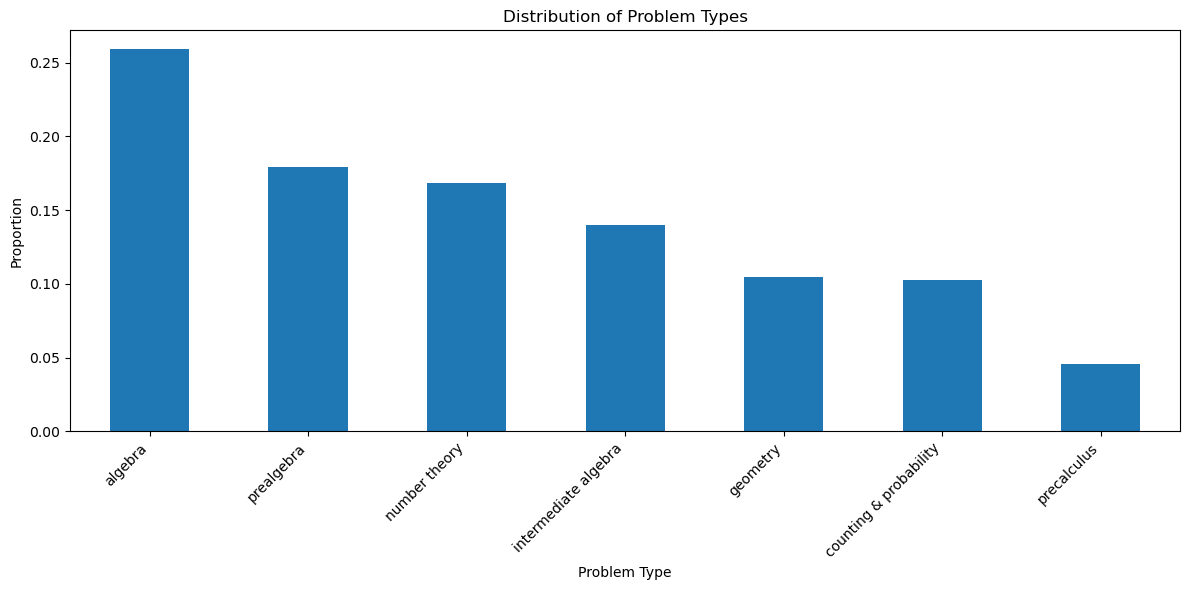

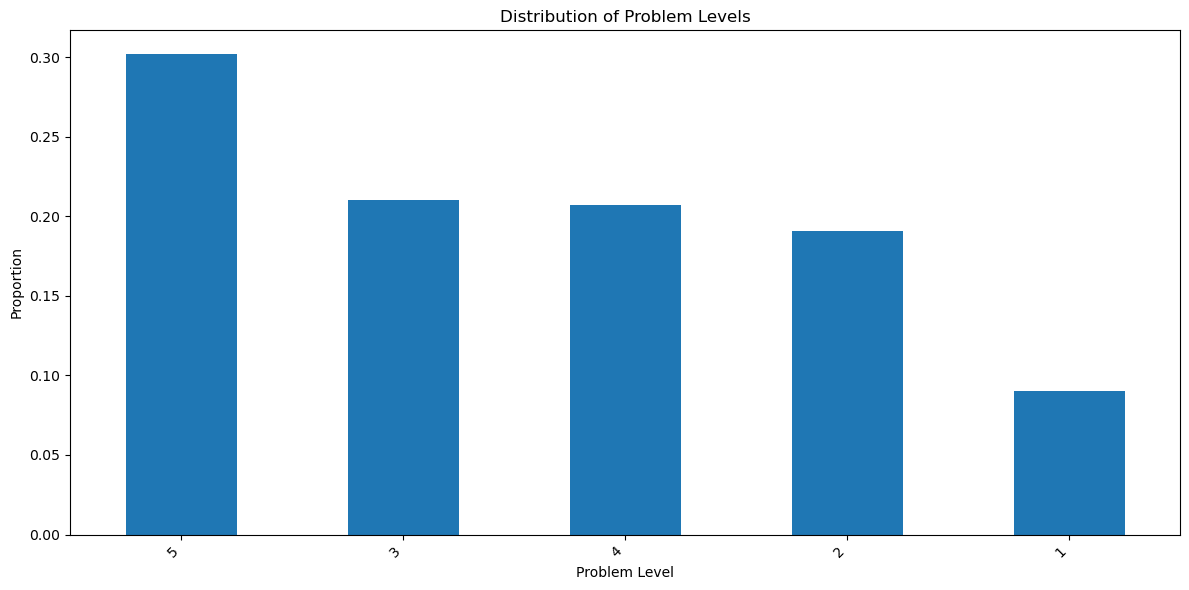

In [11]:
# Get unique types and their frequencies
type_counts = train_df["type"].value_counts()
type_distribution = type_counts / len(train_df)

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
type_distribution.plot(kind="bar")
plt.title("Distribution of Problem Types")
plt.xlabel("Problem Type")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


def sample_by_type_distribution(df, n_samples=50, random_state=None):
    """
    Sample rows from the dataframe according to the distribution of problem types in the training set.

    Args:
        df: DataFrame to sample from
        n_samples: Number of samples to return
        random_state: Random seed for reproducibility

    Returns:
        DataFrame with sampled rows
    """
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Sample types according to their distribution
    sampled_types = np.random.choice(
        type_distribution.index, size=n_samples, p=type_distribution.values
    )

    # Get samples for each type
    samples = []
    for problem_type in sampled_types:
        type_df = df[df["type"] == problem_type]
        samples.append(type_df.sample(n=1))

    return pd.concat(samples).reset_index(drop=True)


# Get unique levels and their frequencies
level_counts = train_df["level"].value_counts()
level_distribution = level_counts / len(train_df)

# Plot the distribution
plt.figure(figsize=(12, 6))
level_distribution.plot(kind="bar")
plt.title("Distribution of Problem Levels")
plt.xlabel("Problem Level")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


def sample_by_level_distribution(df, n_samples=50, random_state=None):
    """
    Sample rows from the dataframe according to the distribution of problem levels in the training set.

    Args:
        df: DataFrame to sample from
        n_samples: Number of samples to return
        random_state: Random seed for reproducibility

    Returns:
        DataFrame with sampled rows
    """
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Sample levels according to their distribution
    sampled_levels = np.random.choice(
        level_distribution.index, size=n_samples, p=level_distribution.values
    )

    # Get samples for each level
    samples = []
    for level in sampled_levels:
        level_df = df[df["level"] == level]
        samples.append(level_df.sample(n=1))

    return pd.concat(samples).reset_index(drop=True)


# Example usage on train set
sampled_train_problems_by_type = sample_by_type_distribution(train_df, n_samples=5)
# print("\nSampled from train set by type distribution:")
# print(sampled_train_problems_by_type)

sampled_train_problems_by_level = sample_by_level_distribution(train_df, n_samples=5)
# print("\nSampled from train set by level distribution:")
# print(sampled_train_problems_by_level)

# Example usage on test set
sampled_test_problems_by_type = sample_by_type_distribution(test_df, n_samples=5)
# print("\nSampled from test set by type distribution:")
# print(sampled_test_problems_by_type)

sampled_test_problems_by_level = sample_by_level_distribution(test_df, n_samples=5)
# print("\nSampled from test set by level distribution:")
# print(sampled_test_problems_by_level)


In [24]:
type_and_level_counts = train_df[["type", "level"]].value_counts()
type_and_level_distribution = type_and_level_counts / len(train_df)


def sample_by_type_and_level_distribution(df, n_samples=50, random_state=None):
    """
    Sample rows from the dataframe according to the distribution of problem levels in the training set.

    Args:
        df: DataFrame to sample from
        n_samples: Number of samples to return
        random_state: Random seed for reproducibility

    Returns:
        DataFrame with sampled rows
    """
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Sample levels according to their distribution
    sampled_levels = np.random.choice(
        type_and_level_distribution.index,
        size=n_samples,
        p=type_and_level_distribution.values,
    )

    # Get samples for each level
    samples = []
    for type, level in sampled_levels:
        type_level_df = df[(df["level"] == level) & (df["type"] == type)]
        samples.append(type_level_df.sample(n=1))

    return pd.concat(samples).reset_index(drop=True)


In [25]:
sample_by_type_and_level_distribution(train_df)

,level,type,question,final_answer,is_answer_numeric
0,5,counting & probability,"In a sequence of coin tosses, one can keep a r...",560,True
1,4,counting & probability,"There are five unmarked envelopes on a table, ...",0,True
2,4,precalculus,Given that $z$ is a complex number such that $...,-1,True
3,5,prealgebra,The graph shows the total distance Sam drove ...,32,True
4,4,geometry,"For the quadrilateral shown, how many differen...",13,True
5,3,number theory,For what value of $n$ is the five-digit number...,5,True
6,2,intermediate algebra,Let $f(x) = x|x|.$ Find $f^{-1}(4) + f^{-1}(-...,-8,True
7,3,algebra,Simplify $\sqrt{8} \times \sqrt{50}$.,20,True
8,5,number theory,Mary told John her score on the American High ...,119,True
9,4,intermediate algebra,The graphs $y = 3(x-h)^2 + j$ and $y = 2(x-h)^...,36,True
